In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logomaker
import pandas as pd

PWM DataFrame:
      A     C    G     T
0  1.00  0.00  0.0  0.00
1  0.00  1.00  0.0  0.00
2  0.00  0.00  1.0  0.00
3  0.19  0.00  0.0  0.81
4  0.00  0.19  0.0  0.81


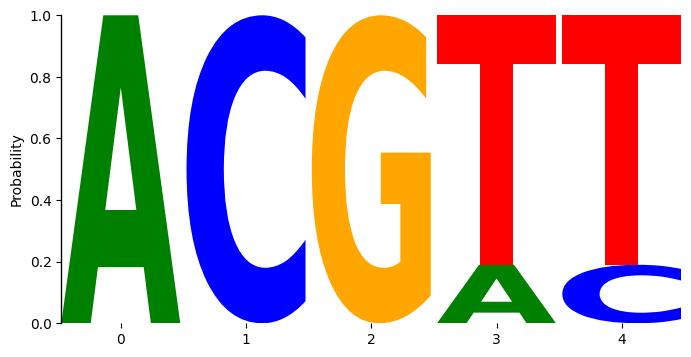

In [25]:
# Input data as a multi-line string
data_str = """
1.00 0.00 0.00 0.00
0.00 1.00 0.00 0.00
0.00 0.00 1.00 0.00
0.19 0.00 0.00 0.81
0.00 0.19 0.00 0.81
"""

# Parse the data into a list of rows
rows = [list(map(float, line.split())) for line in data_str.strip().split('\n')]

# Convert to a DataFrame and label the columns for nucleotides
pwm_df = pd.DataFrame(rows, columns=['A', 'C', 'G', 'T'])

# Print the resulting PWM DataFrame
print("PWM DataFrame:")
print(pwm_df)

fig, ax = plt.subplots(figsize=(8, 4))
logo = logomaker.Logo(pwm_df, ax=ax)

# Style the plot
logo.style_spines(visible=False)
logo.style_spines(spines=['left'], visible=True)
logo.ax.set_ylabel('Probability')

# Show the plot
plt.show()

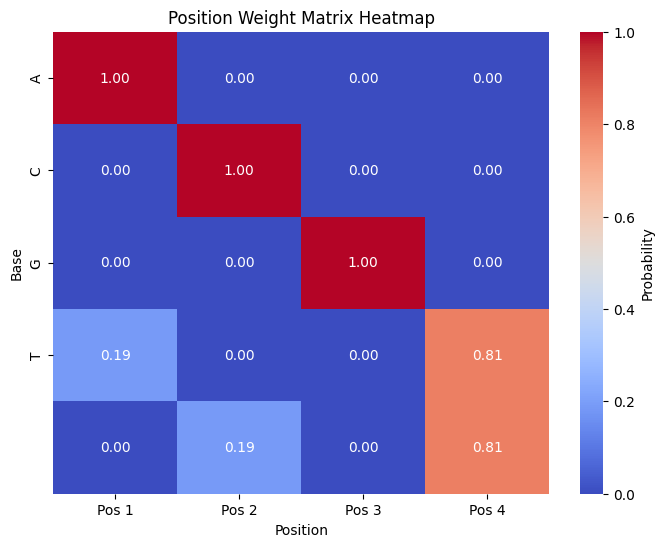

In [26]:
# Example PWM: Rows correspond to bases (A, C, G, T), Columns are positions in a motif
pwm = pwm_df.to_numpy()

# Base labels
bases = ['A', 'C', 'G', 'T']
positions = [f"Pos {i+1}" for i in range(pwm.shape[1])]

# Create the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(pwm, annot=True, cmap='coolwarm', cbar_kws={'label': 'Probability'}, 
                 xticklabels=positions, yticklabels=bases, fmt='.2f')

# Add labels and title
plt.title("Position Weight Matrix Heatmap")
plt.xlabel("Position")
plt.ylabel("Base")
plt.show()